In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import (ColumnTransformer, 
                             make_column_selector, 
                             make_column_selector, )

import sklearn
help (sklearn.compose)

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [19]:
from sklearn import datasets

# Data Read

In [26]:
# df = datasets.load_boston()

# df

X, y = datasets.load_iris(return_X_y=True, as_frame=True)

X.shape
y.shape

(150, 4)

(150,)

In [27]:
X.head(3)
y.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


0    0
1    0
2    0
Name: target, dtype: int64

In [28]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((120, 4), (120,))

((30, 4), (30,))

## steps
- remove columns
- impute numerical features (mean)
- impute categorical features (mode)
- label encode gender
- OHE jobs
- regress on salary

In [46]:
pipe = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')), 
    ('scaler', MinMaxScaler()),
    # ('catg_imputer', SimpleImputer(strategy='most_frequent')), 
    # ('encoder', LabelEncoder()), 
    # ('ohe', OneHotEncoder()), 
    ('estimator', LogisticRegression())
])



col_transf = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='mean'), list(X.columns)), 
    # ('catg_imputer', SimpleImputer(strategy='most_frequent')), 
    # ('encoder', LabelEncoder()), 
    # ('ohe', OneHotEncoder()), 
])

pipe = Pipeline([
    col_transf, 
    ('estimator', LogisticRegression())
])

In [63]:
def run_ml_pipeline(pipe:Pipeline, X_train, y_train, X_test, y_test):
    
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    eval_on_train_data = precision_recall_fscore_support(y_train, y_train_pred)
    eval_on_test_data = precision_recall_fscore_support(y_test, y_test_pred)
    cm_train = ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred))
    cm_test = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
    return {
        'cm_train': cm_train,
        'cm_test': cm_test,
        'eval_on_train_data': eval_on_train_data, 
        'eval_on_test_data': eval_on_test_data
        }
    

In [64]:
dict_model_perfm = run_ml_pipeline(pipe, X_train, y_train, X_test, y_test)

dict_model_perfm.keys()

dict_keys(['cm_train', 'cm_test', 'eval_on_train_data', 'eval_on_test_data'])


Model Evaluation on TRAINING data


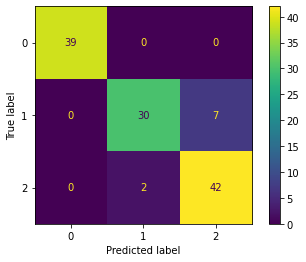


Model Evaluation on VALIDATION data


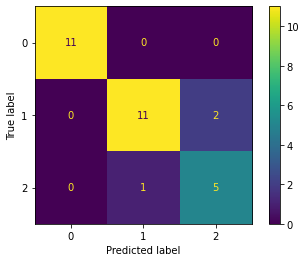

In [70]:
print(f"\nModel Evaluation on TRAINING data")
dict_model_perfm.get('cm_train').plot()
plt.show();
print(f"\nModel Evaluation on VALIDATION data")
dict_model_perfm.get('cm_test').plot()
plt.show();
